In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
# import plotly 
# from plotly.offline import init_notebook_mode,download_plotlyjs,plot,iplot
# init_notebook_mode(connected=True)
# import cufflinks
# cufflinks.go_offline()

In [118]:
df = pd.read_csv('C:/Users/tyagi/Desktop/greatlearn/TensorFlow_FILES/lending_club_loan_two.csv')

In [119]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"


In [120]:
df_info = pd.read_csv('C:/Users/tyagi/Desktop/greatlearn/TensorFlow_FILES/lending_club_info.csv')

In [121]:
df_info.head(2)

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...


In [122]:
def info(col_name):
    if col_name in df_info['LoanStatNew'].unique():
        return df_info[df_info['LoanStatNew']==col_name]
    else:
        print(col_name , ' is not in df_info')

In [123]:
info('mort_acc')

,LoanStatNew,Description
26,mort_acc,Number of mortgage accounts.


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [125]:
# Displaying only string / categorical columns

df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 396030 non-null  object
 1   grade                396030 non-null  object
 2   sub_grade            396030 non-null  object
 3   emp_title            373103 non-null  object
 4   emp_length           377729 non-null  object
 5   home_ownership       396030 non-null  object
 6   verification_status  396030 non-null  object
 7   issue_d              396030 non-null  object
 8   loan_status          396030 non-null  object
 9   purpose              396030 non-null  object
 10  title                394275 non-null  object
 11  earliest_cr_line     396030 non-null  object
 12  initial_list_status  396030 non-null  object
 13  application_type     396030 non-null  object
 14  address              396030 non-null  object
dtypes: object(15)
memory usage: 45.3+ 

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [127]:
df.shape

(396030, 27)

In [128]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

# EXPLORATORY DATA  ANALYSIS

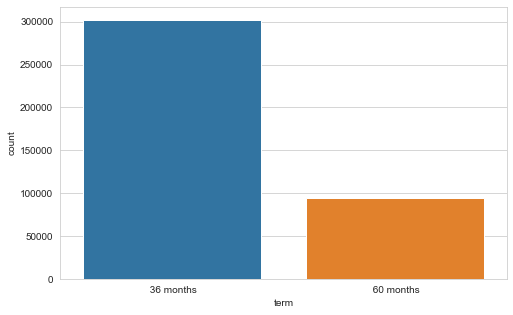

In [129]:
plt.figure(figsize=(8,5))
sns.countplot(df['term'])

(array([0, 1]), <a list of 2 Text xticklabel objects>)

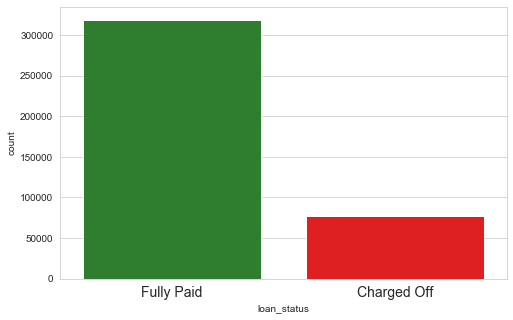

In [130]:
plt.figure(figsize=(8,5))
sns.countplot(df['loan_status'],palette={'Fully Paid':'forestgreen','Charged Off':'red'})
plt.xticks(size=14)

# It is unbalanced Data.
# Unsupervised Data.

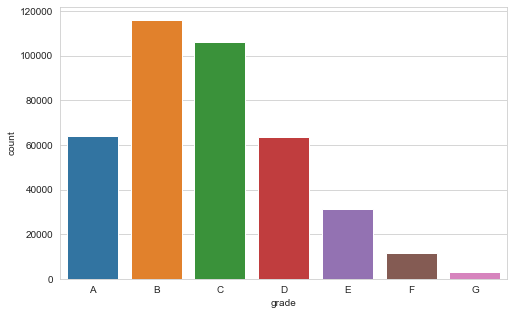

In [131]:
plt.figure(figsize=(8,5))
sns.countplot(df['grade'],order=['A','B', 'C', 'D', 'E', 'F', 'G'])


# we can see that most of the loanee(s) belong to Grade B.

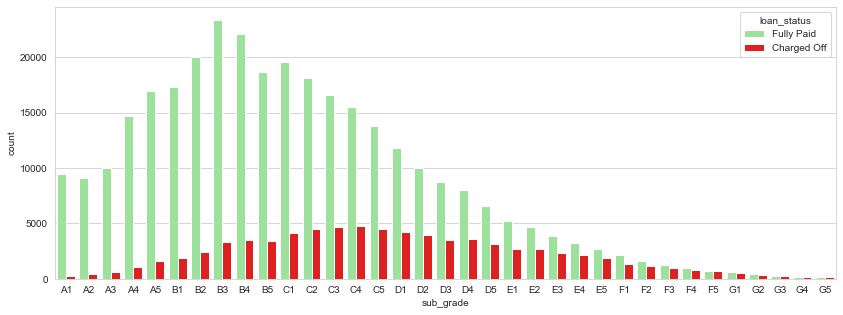

In [132]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(14,5))
sns.countplot(df['sub_grade'],order=sorted(df['sub_grade'].unique()),hue=df['loan_status'],
              palette={'Fully Paid':'lightgreen', 'Charged Off':'red'})


# Sub grades of F and G have almost same no. of Fully paid and charged off loans.

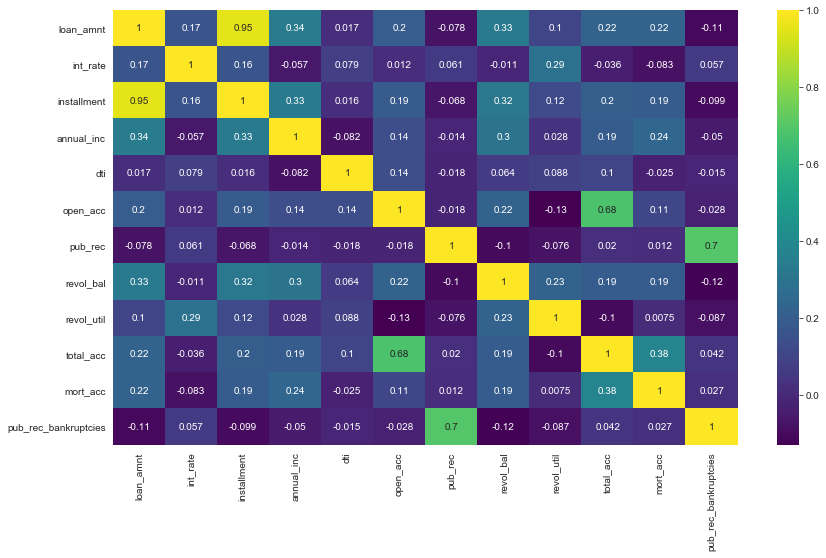

In [133]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

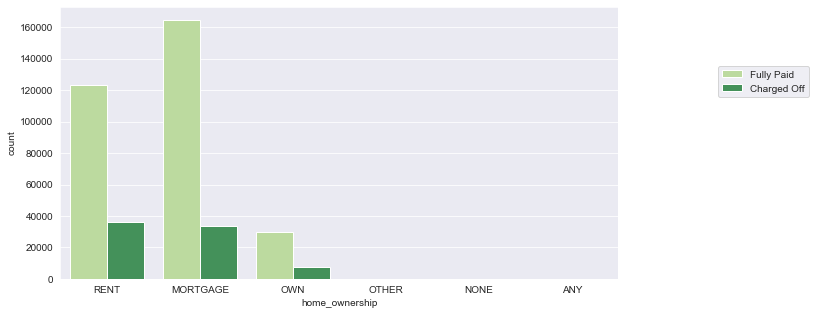

In [156]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
sns.countplot(df['home_ownership'],hue=df['loan_status'],palette=sns.color_palette('YlGn',2))
plt.legend(bbox_to_anchor = (0.5,0.5,0.85,0.3))

# From this we can see that 'OTHER' , 'ANY' and 'NONE' have almost negligible no. of values.
# therefore we can merge oyher, any and none column.

In [135]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [22]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [23]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

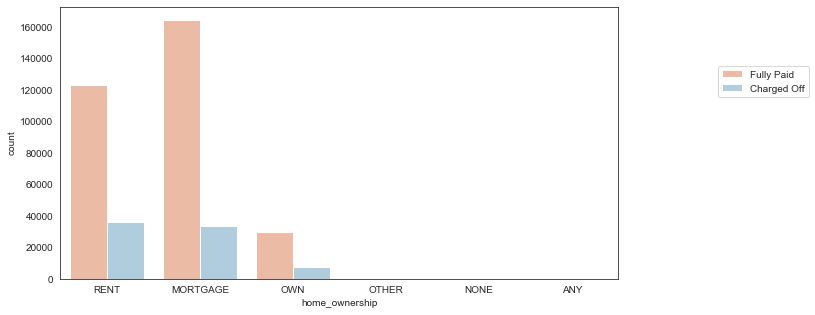

In [163]:
sns.set_style(style='white')
plt.figure(figsize=(10,5))
sns.countplot(df['home_ownership'],hue=df['loan_status'],palette=sns.color_palette('RdBu',2))
plt.legend(bbox_to_anchor = (0.5,0.5,0.85,0.3))

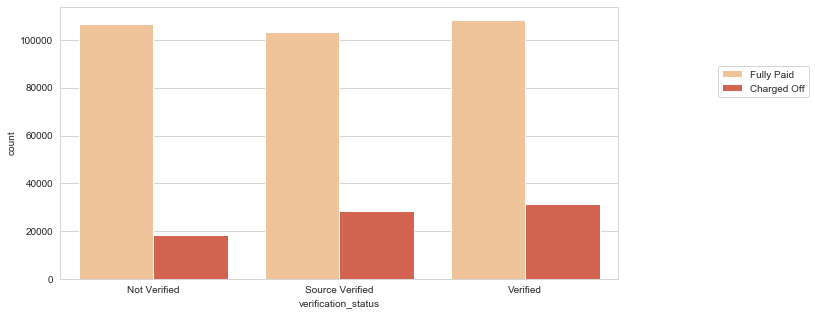

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(df['verification_status'],hue=df['loan_status'],palette=sns.color_palette('OrRd',2))
plt.legend(bbox_to_anchor = (0.5,0.5,0.85,0.3))

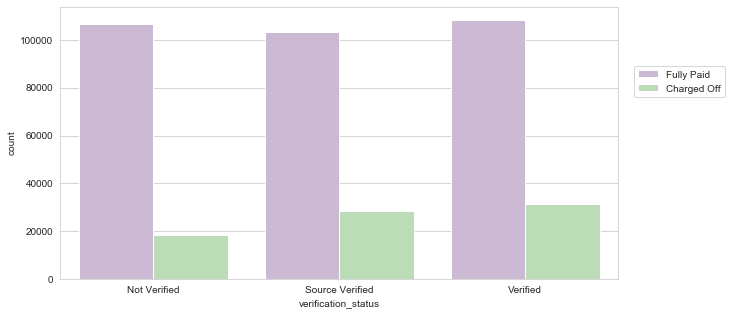

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(df['verification_status'],hue=df['loan_status'],palette=sns.color_palette('PRGn',2))
plt.legend(bbox_to_anchor = (0.5,0.5,0.7,0.3))


# Maximum number of Charged Off cases belong to verified status.

 # FEATURE ENGINEERING / MISSING VALUES / DATA MINING

In [27]:
# MISSING VALUES
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

## MISSING VALUE 1 : employement title column

In [28]:
df['emp_title'].unique()

# As it is historical data, there are several no.of emp_title and also it will not be useful in making predictions.

df = df.drop('emp_title',axis=1)

## MISSING VALUE 2 : employment length column

In [29]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

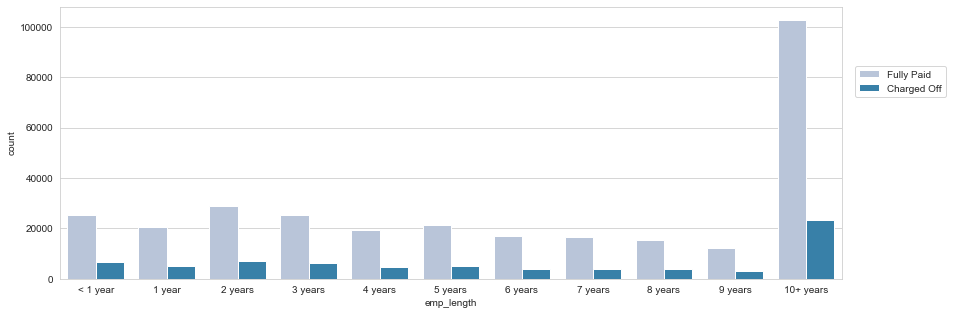

In [30]:
plt.figure(figsize=(14,5))
sns.countplot(df['emp_length'],order=['< 1 year','1 year', '2 years', '3 years', '4 years',
       '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years',],hue=df['loan_status'],
              palette=sns.color_palette('PuBu',2))
plt.legend(bbox_to_anchor = (0.5,0.5,0.64,0.3))


In [31]:
# Hence the graph is showing almost same values till 9 years and max. at 10+ years. not providing much information.

df = df.drop('emp_length',axis=1)

## MISSING VALUE  3 : title column

In [32]:
df['title'].value_counts().count()


# As we have to make predictions, title column does not provinde anny important info regarding predictions.

df = df.drop('title',axis=1)

## MISSING VALUE 4 : pub_rec_bankruptcies column

#### and

## MISSING VALUE 6 : revol_util column


In [33]:
df[['pub_rec_bankruptcies','revol_util']].isnull().sum()

pub_rec_bankruptcies    535
revol_util              276
dtype: int64

In [34]:
len(df['pub_rec_bankruptcies'])

396030

In [35]:
# As no.of null values is less than 0.3% of total values, we can drop such no.of values. it will not affect our prediction.

df.dropna(subset=['pub_rec_bankruptcies','revol_util'],axis=0,inplace=True)

##  MISSING VALUE 5 : mort_acc column


In [36]:
df['mort_acc'].isnull().sum()

# almost 10% of total values. we cannot drop these values and it is relevant for our predictions.

37205

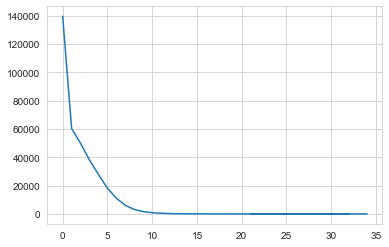

In [37]:
df['mort_acc'].value_counts().plot()

In [38]:
df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381205
annual_inc              0.236277
loan_amnt               0.222381
revol_bal               0.195063
installment             0.193752
open_acc                0.109440
pub_rec_bankruptcies    0.027273
pub_rec                 0.011576
revol_util              0.007514
dti                    -0.025401
int_rate               -0.082656
Name: mort_acc, dtype: float64

In [39]:
info('mort_acc')

,LoanStatNew,Description
26,mort_acc,Number of mortgage accounts.


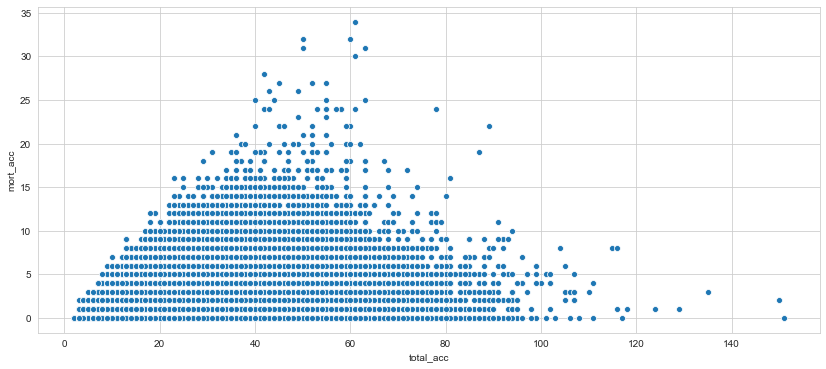

In [40]:
# Checking relation between total number of accounts and number of mortgage accounts.

plt.figure(figsize=(14,6))
sns.scatterplot(df['total_acc'],df['mort_acc'])

In [41]:
df.groupby('total_acc')['mort_acc'].mean()[:10]

total_acc
2.0     0.000000
3.0     0.052326
4.0     0.066743
5.0     0.102108
6.0     0.151123
7.0     0.221827
8.0     0.307414
9.0     0.364772
10.0    0.428702
Name: mort_acc, dtype: float64

In [42]:
# option 1  : I can fillna with forward fill.
# option 2 :  I can fillna on the basis of total account

In [43]:
# Let's go with option 1

df['mort_acc'] = df['mort_acc'].fillna(method='ffill')

In [44]:
df.isnull().sum() 

# NO MISSING VALUES LEFT.

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [45]:
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 395219 non-null  object
 1   grade                395219 non-null  object
 2   sub_grade            395219 non-null  object
 3   home_ownership       395219 non-null  object
 4   verification_status  395219 non-null  object
 5   issue_d              395219 non-null  object
 6   loan_status          395219 non-null  object
 7   purpose              395219 non-null  object
 8   earliest_cr_line     395219 non-null  object
 9   initial_list_status  395219 non-null  object
 10  application_type     395219 non-null  object
 11  address              395219 non-null  object
dtypes: object(12)
memory usage: 39.2+ MB


In [46]:
# columns dropped.

# emp_title
# emp_length
# title
# revol_util
# grade 
# issue_date

# CONVERTING STRING COLUMNS INTO DUMMIES COLUMNS ( INTEGERS )

In [47]:
df = df.drop(['grade','issue_d'],axis=1)

In [48]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

df = df.drop('earliest_cr_line',axis=1)

In [49]:
df['loan_status_int'] = df['loan_status'].replace({'Fully Paid':1,'Charged Off':0})

df = df.drop('loan_status',axis=1)

In [50]:
verify_dum = pd.get_dummies(df['verification_status'],drop_first=True)

df = pd.concat([df,verify_dum],axis=1)

In [51]:
applic_dum = pd.get_dummies(df['application_type'],drop_first=True)

df = pd.concat([df,applic_dum],axis=1)

In [52]:
df = df.drop(['application_type','verification_status'],axis=1)

In [53]:
subgrade_dum = pd.get_dummies(df['sub_grade'],drop_first=True)

df = pd.concat([df,subgrade_dum],axis=1)

In [54]:
home_dum = pd.get_dummies(df['home_ownership'],drop_first=True)

df = pd.concat([df,home_dum],axis=1)

df = df.drop(['sub_grade','home_ownership'],axis=1)

In [55]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [56]:
df = df.drop('address',axis=1)

In [57]:
initial_dum = pd.get_dummies(df['initial_list_status'],drop_first=True)

df = pd.concat([df,initial_dum],axis=1)

df = df.drop('initial_list_status',axis=1)

In [58]:
purpose_dum = pd.get_dummies(df['purpose'],drop_first=True)

df = pd.concat([df,purpose_dum],axis=1)

In [59]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [60]:
df = df.drop('purpose',axis=1)

In [61]:
df['loan_status_int'].value_counts()

1    317696
0     77523
Name: loan_status_int, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 71 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   annual_inc            395219 non-null  float64
 5   dti                   395219 non-null  float64
 6   open_acc              395219 non-null  float64
 7   pub_rec               395219 non-null  float64
 8   revol_bal             395219 non-null  float64
 9   revol_util            395219 non-null  float64
 10  total_acc             395219 non-null  float64
 11  mort_acc              395219 non-null  float64
 12  pub_rec_bankruptcies  395219 non-null  float64
 13  earliest_cr_year      395219 non-null  int64  
 14  loan_status_int       395219 non-null  int64  
 15  

# Train Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = df.drop('loan_status_int',axis=1).values

In [65]:
y = df['loan_status_int'].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=101)

In [67]:
X_train.shape

(296414, 70)

## Normalizing the data

In [68]:
import tensorflow

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
minmax = MinMaxScaler()

In [71]:
X_train = minmax.fit_transform(X_train)

In [72]:
X_test = minmax.transform(X_test)

# Creating the Model

In [74]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation , Dropout

In [75]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [76]:
model.fit(x=X_train,y=y_train,validation_data=[X_test,y_test],epochs=25)

Train on 296414 samples, validate on 98805 samples
Epoch 1/25
296414/296414 [==============================] - 17s 58us/step - loss: 0.3865 - val_loss: 0.3524
Epoch 2/25
296414/296414 [==============================] - 15s 52us/step - loss: 0.3179 - val_loss: 0.2869
Epoch 3/25
296414/296414 [==============================] - 16s 55us/step - loss: 0.2920 - val_loss: 0.2840
Epoch 4/25
296414/296414 [==============================] - 16s 54us/step - loss: 0.2876 - val_loss: 0.2827
Epoch 5/25
296414/296414 [==============================] - 17s 56us/step - loss: 0.2860 - val_loss: 0.2821
Epoch 6/25
296414/296414 [==============================] - 17s 57us/step - loss: 0.2854 - val_loss: 0.2826
Epoch 7/25
296414/296414 [==============================] - 18s 61us/step - loss: 0.2843 - val_loss: 0.2810
Epoch 8/25
296414/296414 [==============================] - 24s 80us/step - loss: 0.2842 - val_loss: 0.2827
Epoch 9/25
296414/296414 [==============================] - 20s 68us/step - loss: 0.2

In [77]:
# Evaluation 

losses = pd.DataFrame(model.history.history)

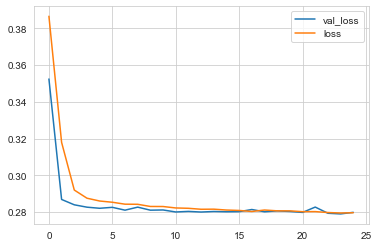

In [91]:
losses.plot()

In [92]:
from sklearn.metrics import classification_report,confusion_matrix

In [93]:
# Predictions

predictions = model.predict_classes(X_test)

In [95]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 8291 11167]
 [    2 79345]]


              precision    recall  f1-score   support

           0       1.00      0.43      0.60     19458
           1       0.88      1.00      0.93     79347

    accuracy                           0.89     98805
   macro avg       0.94      0.71      0.77     98805
weighted avg       0.90      0.89      0.87     98805



In [96]:
# New client for loan

import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_status_int',axis=1).iloc[random_ind]
new_customer

loan_amnt            25000
term                    60
int_rate             18.24
installment         638.11
annual_inc           61665
                     ...  
other                    0
renewable_energy         0
small_business           0
vacation                 0
wedding                  0
Name: 305323, Length: 70, dtype: object

In [97]:
model.predict_classes(new_customer.values.reshape(1,70))

array([[1]])

In [98]:
df.iloc[random_ind]['loan_status_int']

1